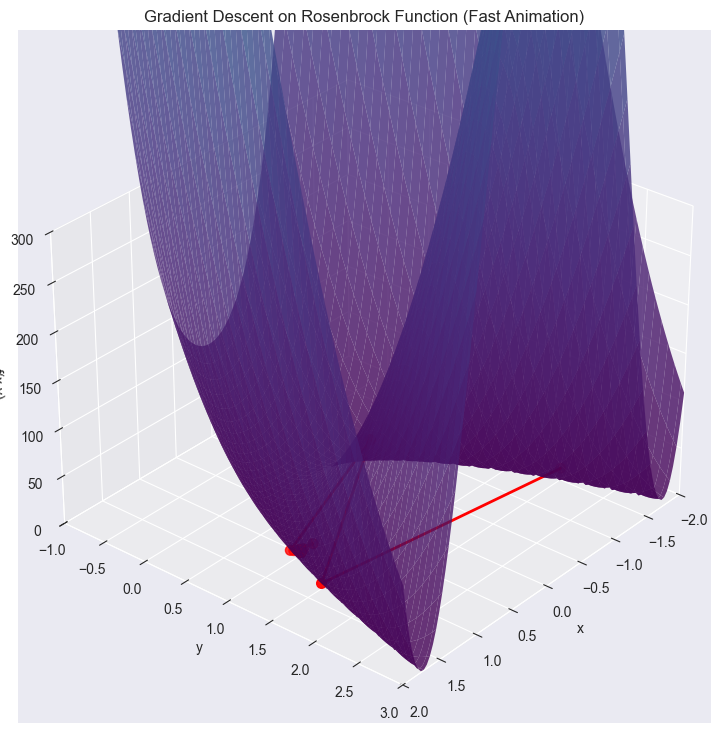

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Define its gradient
def grad_rosenbrock(x, y):
    dfdx = -2*(1 - x) - 400*x*(y - x**2)
    dfdy = 200*(y - x**2)
    return dfdx, dfdy

# Gradient descent optimization for Rosenbrock function with fewer iterations and faster learning rate
def gradient_descent_rosenbrock(x0, y0, lr=0.002, max_iter=1000, tol=1e-6):
    x, y = x0, y0
    path = [(x, y, rosenbrock(x, y))]
    for i in range(max_iter):
        dfdx, dfdy = grad_rosenbrock(x, y)
        x_new = x - lr * dfdx
        y_new = y - lr * dfdy
        path.append((x_new, y_new, rosenbrock(x_new, y_new)))
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            break
        x, y = x_new, y_new
    return np.array(path)

# Compute the optimization path (start from a challenging point)
path = gradient_descent_rosenbrock(-1.5, 2.0, lr=0.002, max_iter=1000)

# Subsample the path to reduce the number of frames (e.g., take every 5th point)
subsampled_path = path[::5]

# Create a grid for the Rosenbrock function surface plot
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

# Set up the 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the Rosenbrock surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Initialize the optimization path line and scatter for the current point
path_line, = ax.plot([], [], [], 'r-', lw=2, label='Optimization Path')
path_scatter = ax.scatter([], [], [], color='red', s=50)

# Set axis limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)
ax.set_zlim(0, 300)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Gradient Descent on Rosenbrock Function (Fast Animation)')

# Animation update function
def update(frame):
    current_path = subsampled_path[:frame]
    if current_path.shape[0] > 0:
        # Update the optimization path (line)
        path_line.set_data(current_path[:, 0], current_path[:, 1])
        path_line.set_3d_properties(current_path[:, 2])
        # Update the current point (scatter)
        path_scatter._offsets3d = (current_path[:, 0], current_path[:, 1], current_path[:, 2])
    # Rotate the view (adjust azimuth angle for faster rotation)
    ax.view_init(elev=30, azim=frame*2)
    return path_line, path_scatter

# Create the animation using the subsampled path frames
frames = len(subsampled_path)
ani = animation.FuncAnimation(fig, update, frames=frames, interval=30, blit=False)

# Save the animation as a GIF (requires pillow)
ani.save("rosenbrock_optimization_3d_fast.gif", writer="pillow", fps=20)

plt.show()

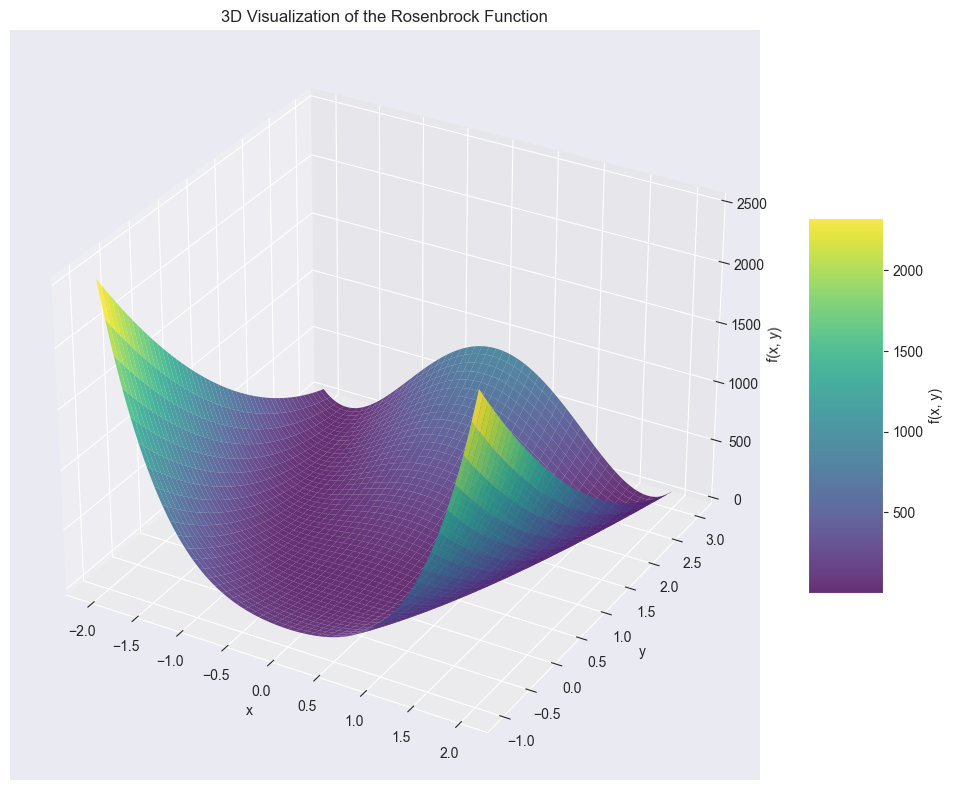

In [3]:
# Define the Rosenbrock function
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Create a grid of values for x and y
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Set up the 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Add a color bar for reference
fig.colorbar(surf, shrink=0.5, aspect=5, label='f(x, y)')

# Set titles and labels
ax.set_title('3D Visualization of the Rosenbrock Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Display the plot
plt.tight_layout()
plt.show()

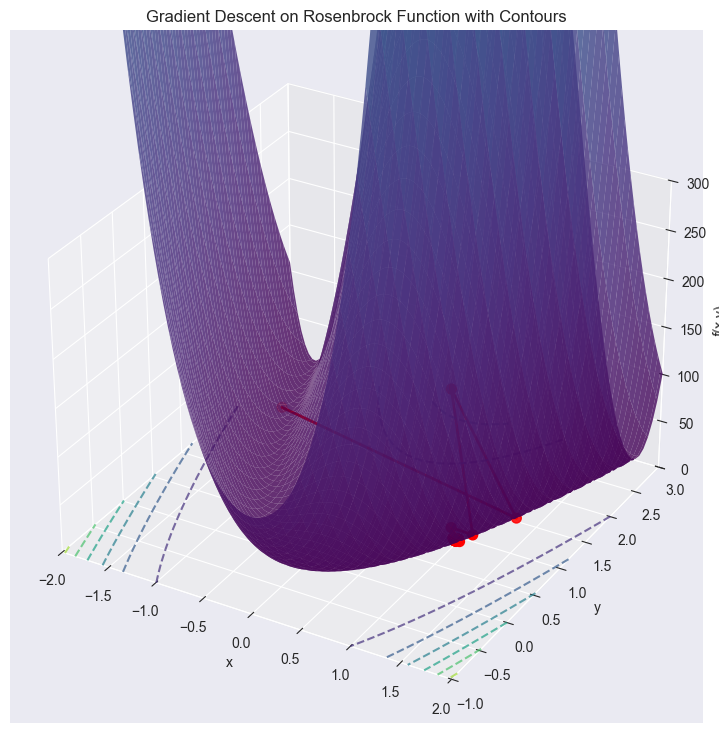

In [4]:

# Compute the optimization path (using a challenging starting point)
path = gradient_descent_rosenbrock(-1.5, 2.0, lr=0.002, max_iter=1000)

# Subsample the path (to reduce the number of animation frames)
subsampled_path = path[::5]

# Create a grid for the Rosenbrock surface
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

# Set up the 3D plot with a fixed view
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=-60)  # fixed viewpoint

# Plot the Rosenbrock surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

# Overlay contour projections on the bottom (z = 0 plane)
cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis', linestyles="dashed", alpha=0.7)

# Initialize the optimization path (line and current point)
path_line, = ax.plot([], [], [], 'r-', lw=2, label='Optimization Path')
path_scatter = ax.scatter([], [], [], color='red', s=50)

# Set axis limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)
ax.set_zlim(0, 300)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Gradient Descent on Rosenbrock Function with Contours')

# Animation update function: update the optimization path over frames
def update(frame):
    current_path = subsampled_path[:frame]
    if current_path.shape[0] > 0:
        path_line.set_data(current_path[:, 0], current_path[:, 1])
        path_line.set_3d_properties(current_path[:, 2])
        # Update the scatter for the current point
        path_scatter._offsets3d = (current_path[:, 0], current_path[:, 1], current_path[:, 2])
    return path_line, path_scatter

# Create the animation using the number of frames from the subsampled path
frames = len(subsampled_path)
ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=False)

# To save the animation as a GIF (requires pillow):
ani.save("rosenbrock_optimization_contours.gif", writer="pillow", fps=20)

plt.show()